INFO 2950 - FINAL PROJECT (Avni, Aryana, and Ishneet)

# Introduction

Our final project hopes to discover a relationship between AQI index, population size, and income level across the different states and their respective counties in the US. We found three separate datasets (state and county AQI, population size, and income level) and pulled all the relevant data we needed to do our analysis. We hope to see if there is any relationship amongst the three variables. 

Our Hypothesis and research questions are: 
On the one hand, we might expect a negative effect of population and income on AQI because a higher population would be correlated with more pollution. Higher income might also be correlated with a higher car ownership, all contributing to lower air quality
On the other hand, we might also expect a positive effect of population and income on AQI because more rural areas (with less population and probably lower income) might be designated as factory/industrial areas, which would lead to lower AQI.  

Our data analysis below will investigate the variables in comparison to one another to see if there are any relationships between the variables, to answer our research question.


# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [25]:
#Our combined and cleaned datasets, done in a previous project phase.
combined = pd.read_csv('FinalCombined.csv')

In [3]:
combined.head()

,Unnamed: 0,State,Abbreviation,County,avg_aqi,Pop_Estimate,Per capita personal income 2018
0,0,Alabama,AL,Baldwin,36.83,"218,022","45,596"
1,1,Alabama,AL,Clay,28.99,"13,275","33,530"
2,2,Alabama,AL,Colbert,35.64,"54,762","38,378"
3,3,Alabama,AL,DeKalb,36.72,"71,385","31,916"
4,4,Alabama,AL,Elmore,35.33,"81,887","42,269"


In [4]:
mean_aqi = np.mean(combined["avg_aqi"])
print('The mean of the average air quality index is', mean_aqi)

combined["Pop_Estimate"] = combined["Pop_Estimate"].str.replace(",", "")
#combined["Pop_Estimate"][0]
combined["Pop_Estimate"] = pd.to_numeric(combined["Pop_Estimate"])
#combined["Pop_Estimate"][0]
mean_pop_est = np.mean(combined["Pop_Estimate"])
print('The mean population estimate is', mean_pop_est)
combined["Per capita personal income 2018"] = combined["Per capita personal income 2018"].str.replace(",", "")
combined["Per capita personal income 2018"] = pd.to_numeric(combined["Per capita personal income 2018"])
mean_income = np.mean(combined["Per capita personal income 2018"])
print('The mean per capita personal income is', mean_income)

The mean of the average air quality index is 38.64214214214209
The mean population estimate is 324117.3923923924
The mean per capita personal income is 48472.238238238235


When trying to calculate the mean of population estimate and per capita personal income 2018 above, we discovered that the values in were strings and the commas were creating errors when trying to conver the values to integers. We tackled this error using the code in the comments above.

In [5]:
#placeholder for standard deviations
std_aqi = np.std(combined["avg_aqi"])
std_pop = np.std(combined["Pop_Estimate"])
std_inc = np.std(combined["Per capita personal income 2018"])
print("The standard deviation of AQI is", std_aqi)
print("The standard deviation of population is", std_pop)
print("The standard deviation of income is", std_inc)

The standard deviation of AQI is 12.181000976956561
The standard deviation of population is 1056408.9896333555
The standard deviation of income is 16221.424142550242


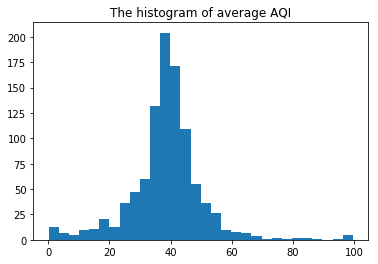

In [6]:
#histogram
plt.hist(combined["avg_aqi"], bins = 30)
plt.title('The histogram of average AQI')
plt.show()

The histogram of the AQI shows us a distribution that looks approximatley like a normal distribution, however it is concentrated around its mean of 38. This is probably due to the high standard deviation of 12.18.

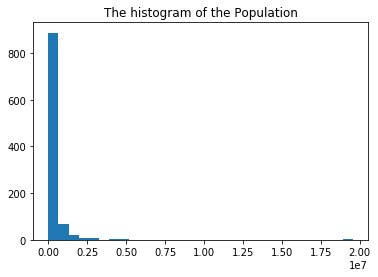

In [7]:
plt.hist(combined["Pop_Estimate"], bins = 30)
plt.title('The histogram of the Population')
plt.show()

From the histogram of the population we can see there are two outliers which means there are two cities whose population is much larger than the mean population. The next histogram is if these two cities are removed.

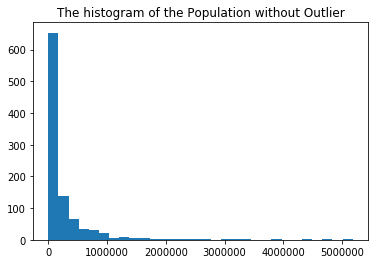

In [8]:
popnoout = combined.loc[combined["Pop_Estimate"] < max(combined["Pop_Estimate"])]
popnoout2 = popnoout.loc[popnoout["Pop_Estimate"] < max(popnoout["Pop_Estimate"])]
plt.hist(popnoout2["Pop_Estimate"], bins = 30)
plt.title('The histogram of the Population without Outlier')
plt.show()

Taking out the two outliers we see that the populations are still highly right skewed. This is probably because there are many more smaller (probably) rural cities than there are larger and overpopulated cities. So even though there is an average of about 324117 people for the cities there are a handful of cities that are much larger than this. 

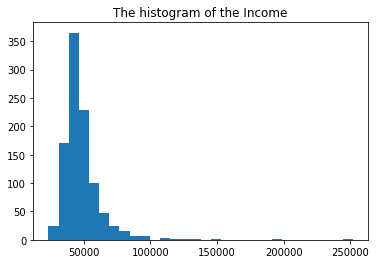

In [9]:
plt.hist(combined["Per capita personal income 2018"], bins = 30)
plt.title('The histogram of the Income')
plt.show()

The above histogram of the personal income is also right skewed as there seems to be two or three cities that have a much higher income than the average of about 48472.

# TO DO: WHICH CITIES HAVE THE INCOMES AND POPULATION THAT ARE "OUTLIERS"

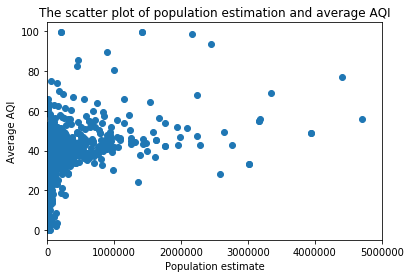

In [10]:
#scatter plot of AQI and population
plt.scatter(combined["Pop_Estimate"], combined["avg_aqi"])
plt.xlim(0, 5000000)
plt.xlabel('Population estimate')
plt.ylabel('Average AQI')
plt.title('The scatter plot of population estimation and average AQI')
plt.show()

There does not seem to be much of a relationship between population estimate and the average AQI. Most of the data points for average AQI are clustered around  

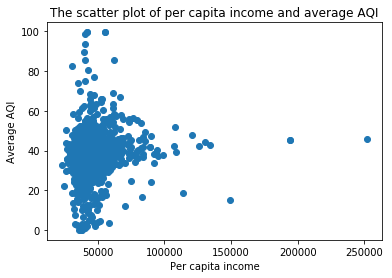

In [11]:
#scatter plot of AQI and income
plt.scatter(combined["Per capita personal income 2018"], combined["avg_aqi"])
#plt.xlim(0, 5000000)
plt.xlabel('Per capita income')
plt.ylabel('Average AQI')
plt.title('The scatter plot of per capita income and average AQI')
plt.show()

The above scatter plot shows that it might be worthwhile exploring the relationship with Average AQI in the x-axis

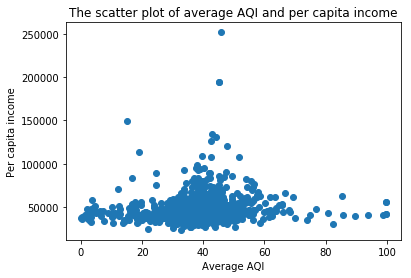

In [12]:
#scatter plot of income and AQI --> might not be necessary
plt.scatter(combined["avg_aqi"], combined["Per capita personal income 2018"])
plt.ylabel('Per capita income')
plt.xlabel('Average AQI')
plt.title('The scatter plot of average AQI and per capita income')
plt.show()

From both the scatter plots, it seems that most counties have a per capita income randing from USD 20,000 till almost 100,000 with a few outliers either way. Most counties seem to be concentrated in the 30-60 AQI range, which is from the good to the moderate range.

In [22]:
#regression model 1: Y = AQI, X = Income
aqi_income = LinearRegression().fit(combined[["Per capita personal income 2018"]], combined["avg_aqi"])
print("The coefficient of per capita personal income on average AQI is", aqi_income.coef_)
print("The intercept of the linear regression is", aqi_income.intercept_)
print("The R^2 score is", aqi_income.score(combined[["Per capita personal income 2018"]], combined["avg_aqi"]))
print("The covariance of AQI and income is", np.cov(combined["Per capita personal income 2018"], 
                                                   combined["avg_aqi"]))

The coefficient of per capita personal income on average AQI is [8.91673971e-05]
The intercept of the linear regression is 34.31999882856415
The R^2 score is 0.014100164586702045
The covariance of AQI and income is [[2.63398263e+08 2.34865375e+04]
 [2.34865375e+04 1.48525459e+02]]


The above model shows that a linear regression is not a good fit for modelling the relationship between per capita personal income and average AQI. The slope also indicates a very slight relationship, and the intercept suggests that if a county has 0 personal income, they are likely to be in a good quality air environment. We can disregard the interpretation of an intercept here since no county in our dataset has 0 income. The covariance between average AQI and per capita personal income, however, is quite high at 2.349 x 10^4. This demonstrates that there is certainly a relationship between the two variables, but not linear like we have just shown.

In [23]:
#regression model 2: Y = Income, X = AQI
income_aqi = LinearRegression().fit(combined[["avg_aqi"]], combined["Per capita personal income 2018"])
print("The coefficient of average AQI on per capita personal income is", income_aqi.coef_)
print("The intercept of the linear regression is", income_aqi.intercept_)
print("The R^2 score is", income_aqi.score(combined[["avg_aqi"]], combined["Per capita personal income 2018"]))
print("The covariance of AQI and income is", np.cov(combined["avg_aqi"], 
                                                   combined["Per capita personal income 2018"]))

The coefficient of average AQI on per capita personal income is [158.13139164]
The intercept of the linear regression is 42361.70252533823
The R^2 score is 0.014100164586702157
The covariance of AQI and income is [[1.48525459e+02 2.34865375e+04]
 [2.34865375e+04 2.63398263e+08]]


When modifying the regression to include average AQI as X and AQI as Y, we found a larger slope which shows that AQI has a larger impact on per capita personal income than the other way around. However, the R^2 value is the same across both regressions, showing that a linear model is not a good fit for modelling the relationship. The covariance is the same as the previous regression too, 

In [24]:
#Regression model 3: Y = AQI , X = Population 
population_aqi = LinearRegression().fit(combined[["Pop_Estimate"]], combined["avg_aqi"])
print("The coefficient of population on average AQI is", population_aqi.coef_)
print("The intercept of the linear regression is", population_aqi.intercept_)
print("The R^2 score is", population_aqi.score(combined[["Pop_Estimate"]], combined["avg_aqi"]))
print("The covariance of population and AQI is", np.cov(combined["Pop_Estimate"], 
                                                   combined["avg_aqi"]))

The coefficient of population on average AQI is [2.63072681e-06]
The intercept of the linear regression is 37.78947782812453
The R^2 score is 0.05205347435596386
The covariance of population and AQI is [[1.11711819e+12 2.93883277e+06]
 [2.93883277e+06 1.48525459e+02]]


The above model can be interpreted by looking at the r-squared value, which shows the strength of the proposed model. This model looks at the relationship between population on AQI index, to see if population has any sort of effect on the average AQI index. The r-squared is actually negative, showing that this model is ineffective and the model is not a good fit. Although, the covariance is a pretty high number, this demonstrates that there is certainly a relationship between the two variables, but not linear like we have just shown.

In [19]:
#Regression model 4: Y = Population , X = AQI
aqi_population = LinearRegression().fit(combined[["avg_aqi"]], combined["Pop_Estimate"])
print("The coefficient of population on average AQI is", aqi_population.coef_)
print("The intercept of the linear regression is", aqi_population.intercept_)
print("The R^2 score is", aqi_population.score(combined[["avg_aqi"]], combined["Pop_Estimate"]))
print("The covariance of average AQI and population is", np.cov(combined["avg_aqi"], 
                                                   combined["Pop_Estimate"]))

The coefficient of population on average AQI is [19786.72743289]
The intercept of the linear regression is -440484.141597199
The R^2 score is 0.05205347435596375
The covariance of average AQI and population is [[1.48525459e+02 2.93883277e+06]
 [2.93883277e+06 1.11711819e+12]]


The above model is similar to the regression model 3, but the x and y variables are switched. We are looking to see if average AQI index has any impact on the population size. Here, we get a positive r-squared value that is close to 0. This means that the model is not a good fit either. Although, like the one above, the covariance between the variables is a high number. This means that there is a relationship between them, just not a linear one as we proved with the regression.

In [34]:
#Regression model 5: Y = Income , X = Population
population_income = LinearRegression().fit(combined[["Pop_Estimate"]], combined["Per capita personal income 2018"])
print("The coefficient of population on average AQI is", population_income.coef_)
print("The intercept of the linear regression is", population_income.intercept_)
print("The R^2 score is", population_income.score(combined[["Pop_Estimate"]], combined["Per capita personal income 2018"]))
print("The covariance of population size and income is", np.cov(combined["Pop_Estimate"], 
                                                   combined["Per capita personal income 2018"]))

ValueError: could not convert string to float: '6,967'

In [26]:
#Now, we will look at the effect of two predictor variables one the one response variable (multiple regression)

In [31]:
#Multiple Regression model 1: Y = AQI index, X = Population estimate and income ("Per capita personal income 2018")
#Popandincome_aqi = 


In [ ]:
#Multiple Regression model 2: Y = Income, X = Population estimate and AQI index
#popandaqi_income = 


# Conclusion

# Acknowledgements

Our combined dataset was from these three individual datasets: 
Datasources
Income - https://www.bea.gov/data/income-saving/personal-income-county-metro-and-other-areas
Data on AQI - https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI
Population estimates - https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/

All of their respective websites were helpful for us to understand more about the data and learn why they were collected.
We also used a lot of Professor Mimno's lectures to guide our understanding of various topics and code used in our data analysis. Our project advisor, Shimona Agarwal was also helpful in understanding the project requirements and ensuring our analysis is sufficient. 

We used these following sources for help as well: 
To convert the strings in population estimation column to numbers: https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python 
https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c